In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [33]:
veri = pd.read_csv("olimpiyatlar_temizlenmis_20220204.csv")
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [34]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [35]:
veri.columns

Index(['Name', 'Gender', 'yas', 'boy', 'kilo', 'takim', 'uok', 'yil', 'sezon',
       'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

# sütun isimlerini değiştirme

In [36]:
#örnek olması için ilk üç sütunu değiştirdim, csv dosyası düzenlenilip paylaşılmış.
veri.rename(columns={'isim'     : 'Name',
                     'cinsiyet' : 'Gender',
                     'Age'      :  'yas'}, inplace=True) #(inplace= True) anlamı, ismi değiştirilen kelimenin direkt üstüne yazılmasını sağlar.

# Sütun Çıkarma

In [37]:
#sütun çıkarma örneği aşağıda yazdığım gibidir. paylaşıla dosya değiştiği için hata veriyor.
veri = veri.drop(["id","oyunlar"], axis=1) #(axis = 1) sütun demektir

KeyError: "['id', 'oyunlar'] not found in axis"

In [38]:
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


# Boy ve Kilo Sütunu Kayıp Veri Doldurma

In [39]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print(len(essiz_etkinlik))
essiz_etkinlik[:10] #baştan 10 tanesini verir

756


array(["Tug-Of-War Men's Tug-Of-War",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom"], dtype=object)

In [40]:
# Her bir etkinliği iteratif olarak dolaş
# Etkinlik özelinde boy ve kilo ortalamalarını hesapla
# Etkinlik özelinde kayıp boy ve kilo değerlerini etk. ort. eşitle

veri_gecici = veri.copy() # gerçek veri bozulmaması için kopyasını oluşturduk.
boy_kilo_liste  = ["boy", "kilo"]

for e in essiz_etkinlik: #Liste içerisinde dolaşacağım
    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etlinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
            tüm_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tüm_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitleyelim
    veri_gecici[etkinlik_filtre] = veri_filtreli

#kayıp değerleri gidelilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım



C:\Users\emreu\AppData\Local\Temp\ipykernel_20100\4067033201.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [41]:
# yaş değişkeninde tanımlı olmayan değerleri bulacağız.
# "tilda" işareti ile yaş değişkeni tanımlı olanlar bulunacak


yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("yas ortlamasi: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()


yas ortlamasi: 25.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      39783 non-null  object 
 1   Gender    39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.9+ MB


In [42]:
# madalya alamayan sporculari veri setinden cikaracagiz
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

0

In [43]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,Name,Gender,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [44]:
veri.to_csv("olimpiyatlar_temizlenmis_20220204.csv", index=False)

In [56]:
#öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyon yazma
def plotHistogram(degisken):
    """""
        girdi   : degisken/sütun ismi
        çikti   : ilgili değişkenin histogrami 
    """""
    
    plt.figure()
    plt.hist(veri[degisken],bins = 85, color="orange")
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("Veri sikligi - {}".format(degisken))
    plt.show()




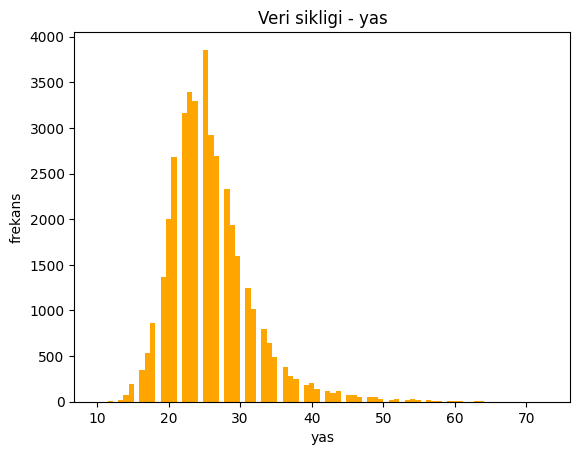

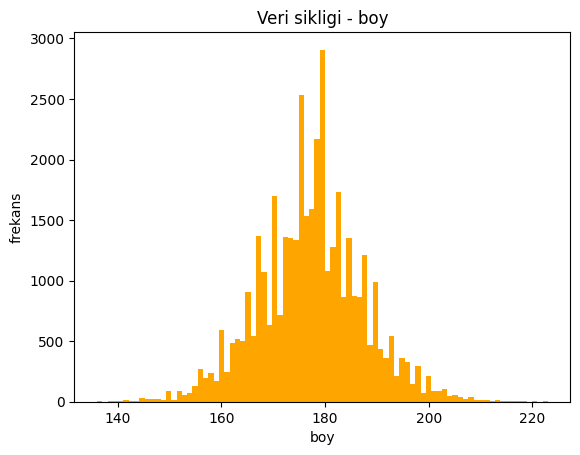

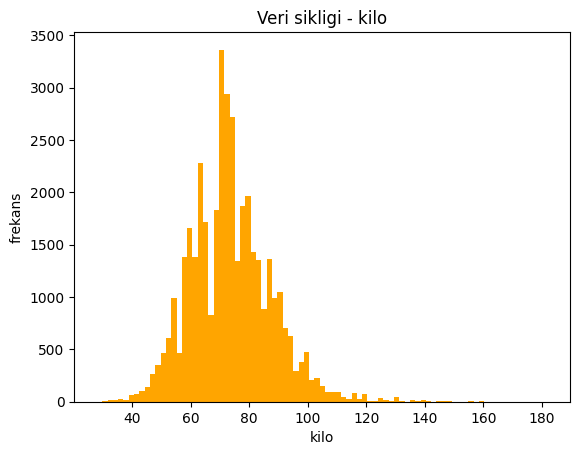

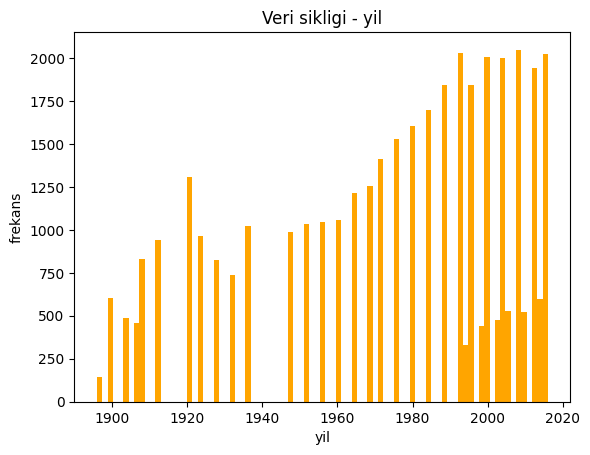

In [57]:
# Tüm sayısal değişkenler için histogramları çizdirelim
Sayisal_degisken = ["yas","boy","kilo","yil"]
for i in Sayisal_degisken:
    plotHistogram(i)

In [58]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000
